# Lab 8
<br>

# Object-Oriented Programming (OOP II)
---

##### CS1P. Semester 2. Python 3.x
 ---

## Purpose of this lab

This lab will exercise your skills in:
* creating classes
* operator overloading
* creating class inheritance
* restaurant management
* flying drone (badly)

In [3]:
from utils.tick import tick

# A. 

## A.1 Matrix manipulation

Implement a Python class called `Matrix` to represent a 2D matrix. The class should support the addition and multiplication of two matrices. The matrix addition and multiplication operations should follow standard mathematical rules.

The `Matrix` class should take one argument `elements` in the `__init__` method, where `elements` is a 2D list representing the elements of the matrix. In addition, the class should have the following methods:

1. `__add__(self, other)` : to overload the addition operator `(+)` for matrix addition.
2. `__mul__(self, other)` : to overload the multiplication operator `(*)` for matrix multiplication.
3. `__eq__(self, other)`: to overload the equality operator `(==)` for comparing elements of two `Matrix` instances. This method should return `True` if the two instances have the same elements, and `False` otherwise. 
3. `__repr__(self)`: to return the string representation in the format of a list of lists, matching the input format.

**Constraints**
* Matrices are guaranteed to be non-empty.
* Matrices will only contain integer values.
* Matrices for multiplication will be compatible, i.e., the number of columns in the first matrix will be equal to the number of rows in the second matrix.

In [5]:
# Test cases

m1 = Matrix([[1, 2], [3, 4]])
m2 = Matrix([[5, 6], [7, 8]])
m3 = Matrix([[2, 0], [1, 3]])
m4 = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # identity matrix
m5 = Matrix([[10, 20, 30], [40, 50 , 60], [70, 80, 90]])
m6 = Matrix([[1, 1, 0], [-1, 0, 1], [0, -1, 1]])
m7 = Matrix([[1, 2, 0], [3, 4, 0], [0, 0, 1]])
m8 = Matrix([[4, -2, 0], [-3, 1, 0], [0, 0, 1]])

with tick():
    assert m1 + m2 == Matrix([[6, 8], [10, 12]])
    assert m1 * m2 == Matrix([[19, 22], [43, 50]])
    assert m1 * m3 == Matrix([[4, 6], [10, 12]])
    assert m1 != Matrix([[5, 6], [7, 8]])
    assert m2 == Matrix([[5, 6], [7, 8]])
    assert m1 + m3 != [[3, 2], [4, 7]]
    assert m4 * m5 == m5
    assert m4 * m6 == Matrix([[1, 1, 0], [-1, 0, 1], [0, -1, 1]])
    assert m7 + m8 == Matrix([[5, 0, 0], [0, 5, 0], [0, 0, 2]])

## A2. Geometry Shapes 

Create a base class `Shape` with attributes `name` and `colour` representing the name and colour of the shape respectively. Next, implement three methods as follows:
* `get_area`: an abstract method that raises `NotImplementedError("Area calculation not implemented for base shape")`
* `get_perimeter`: an abstract method that raises `NotImplementedError("Perimeter calculation not implemented for base shape")`
* `get_info`: a method that return a string containing the shape's name, colour, area (calculated using `self.get_area()`), and perimeter (calculated using `self.get_perimeter()`)

Create three classes `Rectangle`, `Circle`, and `Triangle` that inherit from the `Shape` superclass as follows:

1. `Square`: 
    * Initialise `length` as an additional parameter. 
    * Override `get_area()` to return the square's area (i.e., length ** 2).
    * Override `get_perimeter()` to return the square's perimeter (i.e., 4 * length).
    
2. `Rectangle`: 
    * Initialise `width` and `height` as additional parameters. 
    * Override `get_area()` to return the rectangle's area (i.e., width * height).
    * Override `get_perimeter()` to return the rectangle's perimeter (i.e., 2 * (width + height)).

3. `Circle`: 
    * Initialise `radius` as a parameter and set `pi = 3.14` as a class variable.
    * Override `get_area()` to return the circle's area (i.e., `pi` * radius**2).
    * Override `get_perimeter()` to return the circle's perimeter (i.e., 2 * `pi` * radius).




In [25]:
with tick():
    rect_1 = Rectangle("Rectangle 1", "Blue", 5, 10)
    cir_1 = Circle("Circle 1", "Red", 3)
    cir_2 = Circle("Circle 2", "Magenta", 8)
    squ_1 = Square("Square 1", "Green", 7)
    assert hasattr(rect_1, 'get_info')
    assert rect_1.get_area() == 50
    assert rect_1.get_perimeter() == 30
    assert cir_1.get_area() == 28.26
    assert cir_2.pi == 3.14
    assert cir_1.get_perimeter() == 18.84
    assert hasattr(cir_1, 'colour') and cir_1.colour == "Red"
    assert hasattr(cir_2, 'name') and cir_2.name == "Circle 2"
    assert cir_2.get_area() == 200.96
    assert cir_2.get_perimeter() == 50.24
    assert squ_1.get_area() == 49
    assert squ_1.get_perimeter() == 28
    
    

In [26]:
# more test cases
with tick():
    try:
        s1 = Shape("Shape1", "Yellow")
        s1.get_area()
        s1.get_perimeter()
    except NotImplementedError:
        assert True
    else:
        assert False, "Did not raise NotImplementedError for area and perimeter in basic shape"

## A.3 Fraction

Define a class `Fraction` that takes two arguments (numerator and denominator) in `__init__`. Define the following methods:

* `as_float(self)` returns the fraction as a floating point number (by dividing the numerator by the denominator)
* `as_string(self)` returns the fraction as a string, like "9/8"
* `multiply(self, fraction)` that multiplies the given fraction by *another* instance of `Fraction` (note the rule for multiplying fractions is `a/b * c/d = a*c / b*d`) and returns a new instance of `Fraction`.



In [17]:
## Tests
with tick():
    half = Fraction(1,2)
    two_third = Fraction(2, 3)
    three_eight = Fraction(3, 8)
    assert half.as_float()==0.5
    assert three_eight.as_float()==3.0/8.0    
    assert two_third.as_string()=="2/3"
    assert half.as_string()=="1/2"
    prod = half.multiply(two_third)
    assert prod.as_float() == (1/2) * (2/3)    
    assert prod.as_string() ==  "2/6"
    assert half.as_string()=="1/2"
            

## A.4 Fraction special methods
Modify `Fraction` defined above:

* modify `multiply` so that if the "other" value passed is an instance of  `Fraction`, you multiply as before; if it is an instance of `int` then you multiply the numerator by that integer; and otherwise you raise a `TypeError`.

And add two new methods:

* `__str__(self)`, which just calls `self.as_string` and returns the result;
* `__mul__(self, other)`, which just calls `self.multiply` and returns the result

Verify that you can now:

(a) print out any instance of `Fraction` and see the string value directly;

(b) write products of fractions using the ordinary `*` operator. For example, `print(Fraction(2,3) * Fraction(1,2))` should print `2/6`.


In [19]:
## Tests
with tick():
    half = Fraction(1,2)
    print(half)
    print(half * half)
    print(half * 4)
    assert str(half)=="1/2"    
    two_third = Fraction(2, 3)
    assert str(two_third)=="2/3"
    prod = half * two_third
    assert prod.as_string()=="2/6"
    assert half.multiply(2).as_string() == "2/2"
    assert (half * 2).as_string() == "2/2"
    try: 
        half * 2.0
    except TypeError:
        assert True
    else:
        assert False, "Didn't fail when multiplying by a float"

1/2
1/4
4/2


---

<br>

# B

## B1. Restaurant Management

You have been asked to write a Python program to help a restaurant manage their menu and employees, where the employees could have different status: _Manager_, _Waiter_, and _Chef_.

### a) Menu Class
Create a `Menu` class that allows adding new dishes, retrieving their prices, and displaying the entire menu. The class should initialize an empty dictionary in the `__init__` method to store dish names and their corresponding prices. In addition, the class should also have the following functionalities:
1.  `add_dish`: a method that adds a new dish to the menu along with its price; if the dish already exists in the menu, update its price.
2. `get_price`: a method that retrieves the price of a dish; if the dish is not found, return `0`.
3. `display_menu`: a method that prints the entire menu with dish names and prices in a readable format.

Handle case sensitive dish names appropriately.

In [28]:
# Test cases

menu = Menu()

# Add various dishes to the menu with their prices
menu.add_dish("Pizza", 12.99)
menu.add_dish("Pasta", 10.50)
menu.add_dish("Salad", 7.99)
menu.add_dish("Burger", 8.99)
menu.add_dish("Sushi", 15.99)
menu.add_dish("Steak", 22.99)
menu.add_dish("Ice Cream", 4.50)
menu.add_dish("Coffee", 3.99)
menu.add_dish("Fish Tacos", 11.25)
menu.add_dish("Chicken Alfredo", 13.75)
menu.add_dish("Pizza", 13.50)  # Update pizza price
with tick():
    assert menu.get_price("Shawarma") == 0
    assert menu.get_price("Pizza") == 13.50
    assert menu.get_price("STEAK") == 22.99
    assert menu.get_price("ice cream") == 4.50
    assert len(menu.dishes) == 10

# Display the menu to verify the additions and update
menu.display_menu()

Menu:
- Pizza: £13.5
- Pasta: £10.5
- Salad: £7.99
- Burger: £8.99
- Sushi: £15.99
- Steak: £22.99
- Ice Cream: £4.5
- Coffee: £3.99
- Fish Tacos: £11.25
- Chicken Alfredo: £13.75


### b) Employee Class

Create a base class Employee that will serve as the superclass for all types of employees. This class should include common attributes like `name`, `age`, `salary`, and `department`. Additionally, implement a method called `get_salary` that returns the salary of the employee.

In [30]:
## Tests
with tick():
    e1 = Employee("Frank", 31, 40_000, "Marketing")
    e2 = Employee("Robert", 29, 25_000, "Media")
    assert hasattr(e1, "name") and e1.name=="Frank"
    assert hasattr(e2, "age") and e2.age==29
    assert hasattr(e2, "department") and e2.department=="Media"
    assert e1.get_salary() == 40_000

### c) Manager Class

Inherit from the `Employee` class to create the `Manager` class. Add a specific attribute `bonus` for managers. In addition, override the `get_salary` method from the superclass such that it returns the manager's total salary including their bonus.

In [32]:
# Test cases

## Tests
with tick():
    m1 = Manager("Peter", 35, 40_000, "Management", 500)
    m2 = Manager("Maria", 43, 63_000, "Management", 1000)
    assert hasattr(m1, "bonus") and m1.bonus == 500
    assert hasattr(m2, "age") and m2.age == 43
    assert hasattr(m1, "salary") and m1.salary == 40_000
    assert m2.get_salary() == 64_000
    assert m1.get_salary() == 40_500

### d) Waiter Class

Similarly, inherit from the `Employee` class to create the `Waiter` class. Initialise three new attributes for waiters:
1. `tip_total`: this should be initialised to `0`; however, for each order that the waiter takes, they get a `10%` tip.
2. `tables`: a list of tables assigned to the waiter.
3. `menu`: an instance of the `Menu` class representing the restaurant's menu.

Implement a method `take_order` that takes a list of dishes and returns the total price of an order based on prices from the `menu` object. This total price should include the waiter's `10%` tip. Also, override the `get_salary` method from the superclass such that it returns the waiter's salary including their tip total.

In [36]:
# Test cases

with tick():
    w1 = Waiter("Tom", 25, 20_000, "Service", 0, [1, 2, 3, 5], menu)
    w2 = Waiter("Mary", 17, 13_000, "Service", 0, [5, 6], menu)
    w3 = Waiter("Paul", 27, 31_000, "Service", 0, [1, 2, 3, 4, 6], menu)
    # verify attributes are intialised correctly
    assert hasattr(w1, "name") and w1.name == "Tom"
    assert hasattr(w2, "tip_total") and w2.tip_total == 0
    assert hasattr(w3, "salary") and w3.salary == 31_000
    assert hasattr(w1, "department") and w1.tables == [1, 2, 3, 5]
    # verify methods are working according to specification
    assert w1.take_order(["Pizza", "Pasta", "Ice Cream"]) == 31.35
    assert w1.tip_total == 2.85
    assert w3.take_order(["Pizza", "Pasta", "Fish Tacos", "Chicken Alfredos", "Ice Cream"]) == 43.725
    assert w3.take_order(["Pasta", "Fish tacos", "Sushi", "Steak", "Steak", "Sushi"]) == 109.681
    assert w2.take_order(["Pasta", "Fish Tacos", "Sushi", "Pizza", "Steak"]) == 81.653
    assert w3.tip_total == 13.946
    assert w3.get_salary() == 31013.946
    assert w1.take_order(["Salad", "Burger", "SUSHI", "Coffee"]) == 40.656
    assert w1.get_salary() == 20_006.546
    
    

### d) Chef Class

Inherit from the `Employee` class to create the `Chef` class, which includes an additional attribute `specialty`. Implement a method `cook` that takes a dish name and returns the following string "Chef Guido is preparing Pizza...", where _Guido_ is the `name` of the `Chef` and _Pizza_ is the dish they are preparing.

In [38]:
# Test cases
with tick():
    c1 = Chef("Alice", 35, 60_000, "Kitchen", "Italian")
    c2 = Chef("Shrey", 51, 43_000, "Kitchen", "Indian")
    # verify attributes are intialised correctly
    assert hasattr(c1, "name") and c1.name == "Alice"
    assert hasattr(c1, "specialty") and c1.specialty == "Italian"
    assert hasattr(c2, "salary") and c2.salary == 43_000
    assert c1.cook("Pasta") == 'Chef Alice is preparing Pasta...'
    assert c2.cook("Masala") == 'Chef Shrey is preparing Masala...'

# B2. Flying drones
We are going to use object-orientation to do some simple drone flying; or at least creating paths for drones to follow.

<img src="imgs/drone.jpg" width="50%">

## (a) Vec3

We need a way to represent a drone in space. For the moment, we'll ignore the orientation of the drone. A point in space can be referenced with three coordinates $x,y,z$. Obviously, we could use a list, tuple or NumPy array to represent a point. But it can be useful to define a type that represents a fixed length vector with three *components* and can do the kind of operations we want to be able to do directly.

Define a new class `Vec3` that has the following methods. Note: we will not mutate `Vec3` after creation, so all methods return *new instances*. There are a few methods to implement, but all of them are very simple.

* `__init__(self, x, y, z)`
* `as_list(self)` returns the Vec3 as a list `[x,y,z]`
* `__add__(self, other)` add two Vec3 together by adding their components, returning a new `Vec3`
* `__mul__(self, scale)` multiply each component of Vec3 by the given number `scale` (`scale` is a number, **not** a `Vec3`!). This method returns a new `Vec3`.
* `__truediv__(self, scale)` divide each component of Vec3 by the given number `scale` (`scale` is a number, **not** a `Vec3`!)
* `length(self)`  returns $\sqrt{x^2+y^2+z^2}$
* `direction(self)` multiply each component of Vec3 by `1/length(self)` (`length(self)` is an instance method!). This method returns a new `Vec3`.
* `__matmul__(self, other)` returns the dot product of two vectors, that is a number $(x_1*x_2) + (y_1*y_2) + (z_1*z_2)$
* `__sub__(self, other)` subtract the components of two Vec3, returning a new `Vec3`
* `distance(self, other)` returns `length(self-other)`, the distance between two vectors
* `__str__(self)` returns the vector as a string like `<1.0 0.5 0.1>`
* `__eq__(self, other)` returns True if the `distance` between `self` and `other` is less than `1e-6` (we won't use exact equality for numerical reasons). Also, use the `distance` method you implemented for the `Vec3` class.


In [40]:
## Tests
v1 = Vec3(1, 2, 3)
v2 = Vec3(1.0, 0.0, 1.0)
v3 = Vec3(1.0, 0.0, 0.0)
v4 = Vec3(10.0, 0.0, 0.0)
v5 = Vec3(0.0, 0.0, 1.0)

print(v1, v2, v3)
print(v1 * 2)
print(v1 + v2 - v3 + v4 - v5 * 2)
print(v3.length())

with tick():
    assert v3 * 10 == v4
    assert v4 / 10 == v3
with tick():
    assert v1 - v2 == Vec3(0, 2, 2)
    assert v1 + v2 == Vec3(2, 2, 4)
    assert v3 + v5 == Vec3(1, 0, 1)
with tick():
    assert v3.length() == v5.length()
    assert v1.length() == 14**0.5
    assert v3.length() == 1.0
with tick():
    assert v3.distance(v5) == 2.0**0.5
    assert v4.direction() == v3
    assert v5.direction() == v5
# @ calls __matmuL__
with tick():
    assert v3 @ v3 == 1.0
    assert v3 @ v5 == 0.0
with tick():
    assert v3.as_list() == [1.0, 0.0, 0.0]
    assert (v3*2).as_list() == [2.0, 0.0, 0.0]

#assert v3 @ v3 == 1.0

<1.0 2.0 3.0> <1.0 0.0 1.0> <1.0 0.0 0.0>
<2.0 4.0 6.0>
<11.0 2.0 2.0>
1.0


## (b) Path
Now we need to represent a path along which we intend to send the drone. Again, this is something we can represent as an object, with a specific set of methods we can use to operate upon it.

A path is a sequence of points in space, each with a time. To do this, we need to be able to specify the points in space (as `Vec3`s) we want to reach at each time point, and be able to get the point the drone is supposed to be at for *any* possible time. We'll store this as a sequence of `(time, point)` pairs, where `time` is a floating point number.

To do this, we'll assume that the drone is expected to move in a perfectly straight line between two given points, and use the simple *linear interpolation formula* to compute the position of a drone. 

Create a class `Path` that has the following methods. These define the API (application programmer's interface) that we can use to manipulate `Path`s.

* `__init__` which initialises an empty path
* `add(self, pt, t)` adds as a tuple/list, a new point `pt` (a `Vec3`) to be reached at time `t` (a floating point number). 
* `get(self, t)` return the position the drone should be at time `t`. To find the this point:
    * If there are no points in the path, raise a `ValueError` 
    * If there is just one point, return it
    * if `t` is smaller than any time in the path, return the point with smallest `t`
    * if `t` is greater than any time in the path, return the point with largest `t`
    * otherwise:
        * find the first time in the list greater than `t`, `t2` and the corresponding point in space `p2`
        * find the immediately previous point (in the sense of time) in the list `p1` and its time `t1`
        * compute the position `p` of the drone at time `t` using the formula:
            * `a = (t - t1) / (t2 - t1)`
            * `p = p1 * (1-a)  + p2* a`
* `t_range(self)`, which returns the minimum and maximum value of `t` in the sequence, as a tuple. 
    
* Note: you can (but definitely don't have to) store the list of times and points in sorted order, and use binary search to find the times. This is more efficient than the simple approach but more complicated to get right.
    

In [42]:
## Tests
p = Path()
p.add(Vec3(0,0,0), 0.0)
with tick():
    try:
        p.get(0)
    except ValueError:
        assert True
p.add(Vec3(1,0,0), 1.0)
with tick():
    assert p.t_range() == (0.0, 1.0)
with tick():
    assert p.get(0.0) == Vec3(0,0,0)
    assert p.get(1.0) == Vec3(1,0,0)
p.add(Vec3(1,0,1), 2.0)    
with tick():
    assert p.get(2.0) == Vec3(1,0,1)
    
    assert p.get(0.5) == Vec3(0.5, 0, 0)
    assert p.get(0.25) == Vec3(0.25, 0, 0)
    assert p.get(1.5) == Vec3(1, 0, 0.5)
    assert p.t_range() == (0.0, 2.0)
    
with tick():    
    p.add(Vec3(0,1,0), 0.5)
    assert p.get(0.5) == Vec3(0,1,0)
    assert p.get(0.25) == Vec3(0,0.5,0)
    assert p.get(0.75) == Vec3(0.5,0.5,0)
    
p.add(Vec3(1,0,1), -2.0)    
with tick():
    assert p.t_range() == (-2.0, 2.0)
    assert p.get(-2)==Vec3(1,0,1)

## Displaying a path
The drone simulator knows how to work with `Path` objects, so we can now do our first test. However, the drone currently lacks a controller, so it will be unable to fly. We'll see the path, though.



In [43]:
drone_path = Path()
# on ground
drone_path.add(Vec3(0,0,0), 0)
# up
drone_path.add(Vec3(0,0,2), 1)
# forward, up
drone_path.add(Vec3(5,0,5), 5)
# left
drone_path.add(Vec3(5,7,7), 10)
# backward
drone_path.add(Vec3(-5,7,7), 15)
# right
drone_path.add(Vec3(-5,-7,5), 20)
# forward
drone_path.add(Vec3(5,-7,5), 25)
# left
drone_path.add(Vec3(5,0,5), 30)
# home
drone_path.add(Vec3(0,0,0), 35)

We can now see the path generated.

<IPython.core.display.Javascript object>


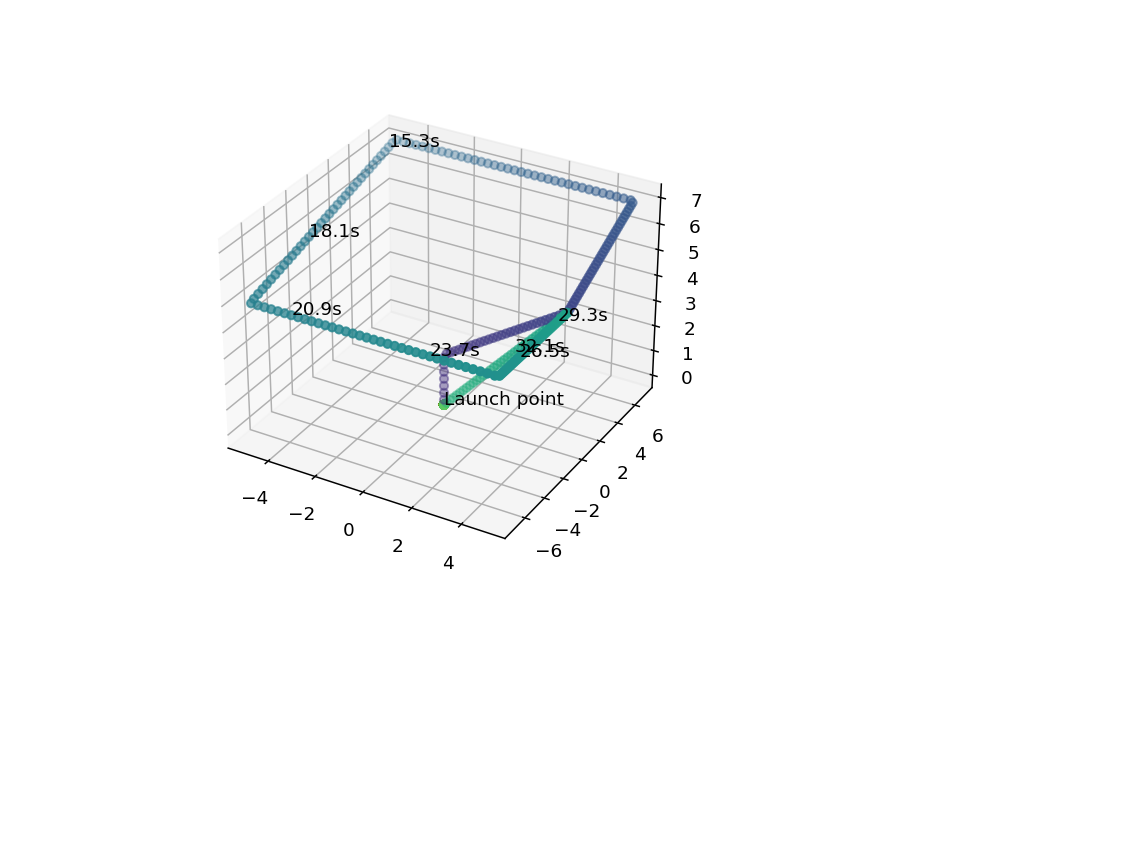

In [46]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# show the drone path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# sample a path at regular points
def sample_path(path, ts):
    return np.array([path.get(t).as_list() for t in ts])
   
# plot the drone path    
times = np.linspace(-10, 60, 500)
label_times = times[180:-180:20]
np_path = sample_path(drone_path, times)
ax.scatter(np_path[:,0], np_path[:,1], np_path[:,2], cmap='viridis', c=times)
ax.text(0,0,0,"Launch point")

# show some time labels on the path
for t in label_times:
    # we can sample at *any* time, which makes this easy to write
    drone_pt = drone_path.get(t)
    ax.text(drone_pt.x, drone_pt.y, drone_pt.z, f"{t:.1f}s")


In [47]:
# run this cell to change the width of the current notebook
# this saves you from scrolling to the side when a code line is too long

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))